<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Fundamentos de Linguagem Python - Do Básico a Aplicações de IA</font>
# <font color='blue'>Mini-Projeto 1</font>
# <font color='blue'>Análise de Vendas Para Loja de E-commerce com NumPy, Pandas e Matplotlib</font>

## 1. Definição do Problema de Negócio

**1.1. O Problema de Negócio**

Nossa loja de e-commerce está em fase de crescimento, registrando um volume cada vez maior de transações diárias. No entanto, essa grande quantidade de dados de vendas, em seu estado bruto, é como um baú de tesouro trancado: sabemos que há valor ali, mas não conseguimos acessá-lo.

Atualmente, muitas de nossas decisões estratégicas são baseadas em intuição e observações parciais, o que nos leva a enfrentar os seguintes desafios:

- Gestão de Estoque Ineficiente: Não temos clareza sobre quais produtos são nossos "campeões de venda" e quais estão parados nas prateleiras. Isso resulta em excesso de estoque de itens de baixa procura e falta de produtos de alta demanda.

- Marketing com Baixo Retorno: Nossas campanhas de marketing são genéricas, pois não sabemos quais categorias de produtos atraem mais os clientes ou em quais regiões geográficas nosso público está mais concentrado.

- Perda de Oportunidades Sazonais: Não conseguimos identificar padrões ou tendências de vendas ao longo dos meses. Isso nos impede de planejar promoções estratégicas para períodos de alta ou de criar ações para impulsionar as vendas em meses de baixa.

- Expansão sem Direção: Temos o desejo de expandir, mas não sabemos quais mercados regionais são mais promissores ou onde nossos esforços logísticos deveriam ser focados.

O problema central é a falta de visibilidade clara sobre a performance do negócio, o que nos impede de tomar decisões rápidas, inteligentes e baseadas em evidências.

**1.2. Objetivos do Projeto**

Este projeto de análise de dados visa transformar nossos dados brutos de vendas em insights acionáveis. O objetivo é responder a quatro perguntas de negócio fundamentais:

- O que vender? Identificar os produtos de maior sucesso para otimizar nosso portfólio e estoque.
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
- Onde focar? Compreender quais categorias de produtos geram a maior parte da nossa receita.

- Quando agir? Analisar a performance de vendas ao longo do tempo para identificar tendências, picos e sazonalidades.

- Para onde expandir? Mapear a distribuição geográfica de nossas vendas para descobrir nossos mercados mais fortes.

**1.3. Solução Proposta**

A solução consiste em consolidar, limpar e analisar o histórico de dados de vendas da nossa plataforma. Utilizando ferramentas de análise de dados (como Python com Pandas, NumPy e Matplotlib), vamos processar essas informações e criar um relatório visual que apresente as descobertas de forma clara e intuitiva para as equipes de gestão, marketing e operações.

**1.4. Resultados Esperados e Benefícios de Negócio**

Ao final deste projeto, esperamos alcançar os seguintes resultados:

- Otimização de Estoque: Com a lista dos produtos mais e menos vendidos, poderemos ajustar nossas compras, reduzir custos com armazenamento e evitar a perda de vendas por falta de produto.

- Marketing Direcionado e Eficaz: Sabendo quais categorias e regiões são mais lucrativas, a equipe de marketing poderá criar campanhas segmentadas, aumentando o retorno sobre o investimento (ROI).

- Planejamento Estratégico: A visualização das tendências mensais permitirá um melhor planejamento financeiro, promocional e de recursos, antecipando períodos de alta e baixa demanda.

- Decisões Baseadas em Dados: Substituiremos a intuição por dados concretos, criando uma cultura orientada a dados que impulsionará o crescimento sustentável do negócio.

## 2. Importação das Bibliotecas

In [1]:
# Instala o pacote watermark
!pip install -q -U watermark

In [2]:
# Importação da biblioteca para manipulação de dados em tabelas
import pandas as pd  

# Importação da biblioteca NumPy para operações matemáticas e arrays
import numpy as np  

# Importação da biblioteca Matplotlib para geração de gráficos
import matplotlib.pyplot as plt  

# Importação da biblioteca Seaborn para visualização estatística de dados
import seaborn as sns  

# Importação da biblioteca random para geração de números aleatórios
import random  

# Importação das classes datetime e timedelta para manipulação de datas e intervalos de tempo
from datetime import datetime, timedelta  

# Comando mágico do Jupyter Notebook que permite exibir gráficos diretamente no notebook
%matplotlib inline  

In [3]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [4]:
%watermark --iversions

matplotlib: 3.10.0
numpy     : 2.1.3
seaborn   : 0.13.2
pandas    : 2.2.3



In [5]:
# Para instalar uma versão específica de um pacote, podemos fazer assim (por exemplo):
!pip install -q pandas==2.3.1

## 3. Função Para Geração de Dados Fictícios

Excelente forma de praticar muito do que vimos até aqui neste capítulo.

In [6]:
# Definição da função para gerar dados fictícios de vendas
def dsa_gera_dados_ficticios(num_registros = 600):
    
    """
    Gera um DataFrame do Pandas com dados de vendas fictícios.
    """

    # Mensagem inicial indicando a quantidade de registros a serem gerados
    print(f"\nIniciando a geração de {num_registros} registros de vendas...")

    # Dicionário com produtos, suas categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco': 550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Cria uma lista apenas com os nomes dos produtos
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    # Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista que armazenará os registros de vendas
    dados_vendas = []

    # Define a data inicial dos pedidos
    data_inicial = datetime(2026, 1, 1)

    # Loop para gerar os registros de vendas
    for i in range(num_registros):
        
        # Seleciona aleatoriamente um produto
        produto_nome = random.choice(lista_produtos)

        # Seleciona aleatoriamente uma cidade
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendida entre 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Se o produto for Mouse ou Teclado, aplica desconto aleatório de até 10%
        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda à lista
        dados_vendas.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })
    
    # Mensagem final indicando que a geração terminou
    print("Geração de dados concluída.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

## 4. Gerar, Carregar e Explorar os Dados

In [7]:
# Gera os dados chamando a função da célula anterior
df_vendas = dsa_gera_dados_ficticios(500)


Iniciando a geração de 500 registros de vendas...
Geração de dados concluída.



In [8]:
type(df_vendas)

pandas.core.frame.DataFrame

In [9]:
# Shape
df_vendas.shape

(500, 9)

In [10]:
# Exibe as 5 primeiras linhas do DataFrame
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 03:00:00,Teclado Mecânico,Acessórios,515.75,3,126,Belo Horizonte,MG
1,1001,2026-01-01 03:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Salvador,BA
2,1002,2026-01-01 12:00:00,Mouse Vertical,Acessórios,225.83,7,132,Curitiba,PR
3,1003,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.00,6,138,Curitiba,PR
4,1004,2026-01-01 09:00:00,Headset 7.1,Acessórios,800.00,7,134,Fortaleza,CE


In [11]:
# Exibe as 5 últimas linhas do DataFrame
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-04-10 08:00:00,Monitor Ultrawide,Eletrônicos,2800.00,5,129,São Paulo,SP
496,1496,2026-04-10 07:00:00,Laptop Gamer,Eletrônicos,7500.00,3,145,Belo Horizonte,MG
497,1497,2026-04-10 21:00:00,Monitor Ultrawide,Eletrônicos,2800.00,3,101,Porto Alegre,RS
498,1498,2026-04-10 06:00:00,Monitor Ultrawide,Eletrônicos,2800.00,6,129,Porto Alegre,RS
499,1499,2026-04-10 13:00:00,Teclado Mecânico,Acessórios,541.65,6,124,Rio de Janeiro,RJ


In [12]:
# Exibe informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [13]:
# Resumo estatístico
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-02-19 23:44:02.400000,2296.732340,4.036000,125.182000
min,1000.000000,2026-01-01 03:00:00,225.410000,1.000000,100.000000
25%,1124.750000,2026-01-26 04:15:00,600.000000,2.000000,113.000000
50%,1249.500000,2026-02-19 23:00:00,1200.000000,4.000000,126.000000
75%,1374.250000,2026-03-16 21:30:00,2800.000000,6.000000,138.000000
max,1499.000000,2026-04-10 21:00:00,7500.000000,7.000000,149.000000
std,144.481833,NaN,2421.144861,2.051126,14.541657


In [14]:
# Tipos de dados
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

## 5. Limpeza, Pré-Processamento e Engenharia de Atributos

In [15]:
# Se a coluna 'Data_Pedido' não estiver como tipo datetime, precisamos fazer a conversão explícita
# A coluna pode ser usada para análise temporal
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [16]:
# Engenharia de atributos
# Criando a coluna 'Faturamento' (preço x quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [17]:
# Engenharia de atributos
# Usando uma função lambda para criar uma coluna de status de entrega
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [18]:
# Exibe informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_Entrega  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


In [19]:
# Exibe as 5 primeiras linhas novamente para ver as novas colunas
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 03:00:00,Teclado Mecânico,Acessórios,515.75,3,126,Belo Horizonte,MG,1547.25,Rápida
1,1001,2026-01-01 03:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Salvador,BA,2800.00,Normal
2,1002,2026-01-01 12:00:00,Mouse Vertical,Acessórios,225.83,7,132,Curitiba,PR,1580.81,Normal
3,1003,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.00,6,138,Curitiba,PR,16800.00,Normal
4,1004,2026-01-01 09:00:00,Headset 7.1,Acessórios,800.00,7,134,Fortaleza,CE,5600.00,Normal


## 6. Análise 1 - Top 10 Produtos Mais Vendidos
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Quais os top 10 produtos mais vendidos?

In [20]:
# Agrupa por nome do produto, soma a quantidade e ordena para encontrar os mais vendidos
top_10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending = False).head(10)

In [21]:
# Exibe o resultado
top_10_produtos

Nome_Produto
Monitor Ultrawide    277
Teclado Mecânico     269
SSD 1TB              256
Laptop Gamer         255
Headset 7.1          246
Mouse Vertical       246
Cadeira Gamer        235
Placa de Vídeo       234
Name: Quantidade, dtype: int64

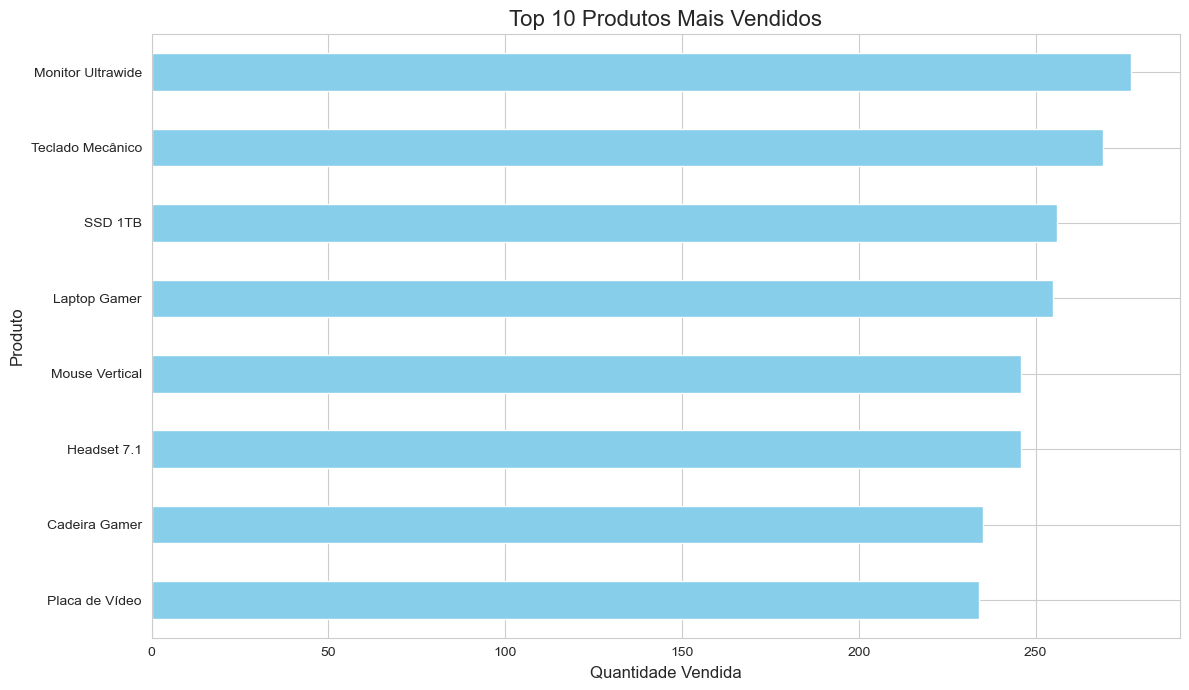

In [22]:
# Define um estilo para os gráficos
sns.set_style("whitegrid")

# Cria a figura e os eixos
plt.figure(figsize = (12, 7))

# Cria o gráfico de barras horizontais
top_10_produtos.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

# Adiciona títulos e labels
plt.title('Top 10 Produtos Mais Vendidos', fontsize = 16)
plt.xlabel('Quantidade Vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)

# Exibe o gráfico
plt.tight_layout()
plt.show()

## 7. Análise 2 - Faturamento Mensal

Qual foi o faturamento mensal?

In [23]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 03:00:00,Teclado Mecânico,Acessórios,515.75,3,126,Belo Horizonte,MG,1547.25,Rápida
1,1001,2026-01-01 03:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Salvador,BA,2800.00,Normal
2,1002,2026-01-01 12:00:00,Mouse Vertical,Acessórios,225.83,7,132,Curitiba,PR,1580.81,Normal
3,1003,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.00,6,138,Curitiba,PR,16800.00,Normal
4,1004,2026-01-01 09:00:00,Headset 7.1,Acessórios,800.00,7,134,Fortaleza,CE,5600.00,Normal


In [24]:
# Cria uma coluna 'Mes' para facilitar o agrupamento mensal
df_vendas['Mes'] = df_vendas['Data_Pedido'].dt.to_period('M')

In [25]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega,Mes
0,1000,2026-01-01 03:00:00,Teclado Mecânico,Acessórios,515.75,3,126,Belo Horizonte,MG,1547.25,Rápida,2026-01
1,1001,2026-01-01 03:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,110,Salvador,BA,2800.00,Normal,2026-01
2,1002,2026-01-01 12:00:00,Mouse Vertical,Acessórios,225.83,7,132,Curitiba,PR,1580.81,Normal,2026-01
3,1003,2026-01-01 16:00:00,Monitor Ultrawide,Eletrônicos,2800.00,6,138,Curitiba,PR,16800.00,Normal,2026-01
4,1004,2026-01-01 09:00:00,Headset 7.1,Acessórios,800.00,7,134,Fortaleza,CE,5600.00,Normal,2026-01


In [26]:
# Agrupa por mês e soma o faturamento
faturamento_mensal = df_vendas.groupby('Mes')['Faturamento'].sum()

In [27]:
# Converte o índice para string para facilitar a plotagem no gráfico
faturamento_mensal.index = faturamento_mensal.index.strftime('%Y-%m')

In [28]:
# Formata para duas casas decimais
faturamento_mensal.map('R$ {:,.2f}'.format)

Mes
2026-01    R$ 1,266,113.84
2026-02    R$ 1,273,896.29
2026-03    R$ 1,542,638.98
2026-04      R$ 489,848.29
Name: Faturamento, dtype: object

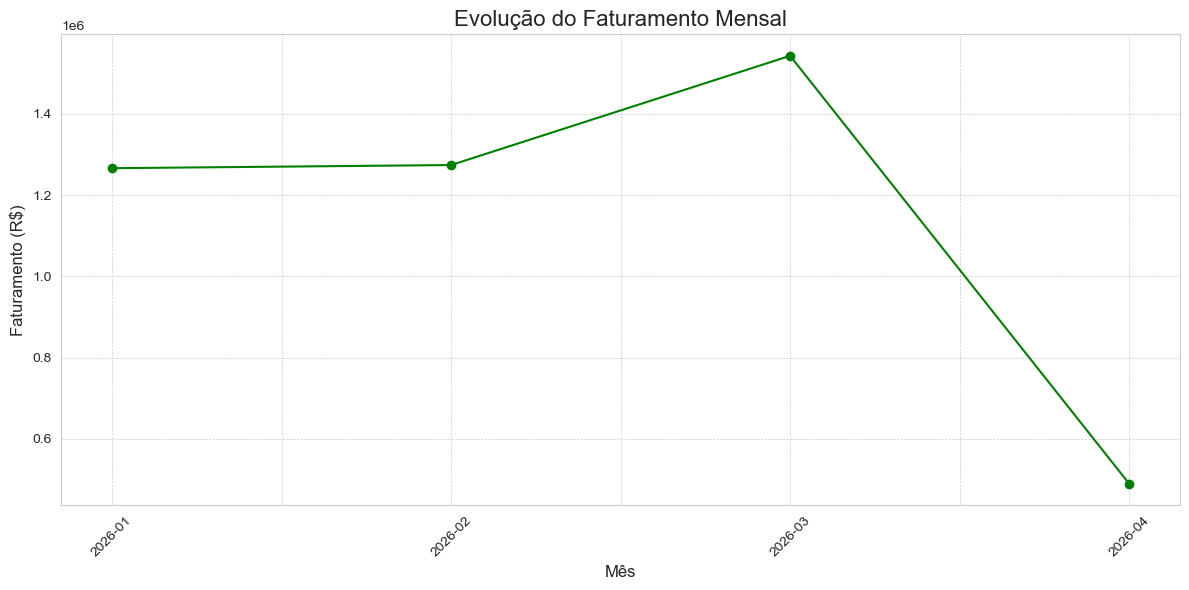

In [29]:
# Cria uma nova figura com tamanho de 12 por 6 polegadas
plt.figure(figsize = (12, 6))

# Plota os dados de faturamento mensal em formato de linha
faturamento_mensal.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

# Define o título do gráfico com fonte de tamanho 16
plt.title('Evolução do Faturamento Mensal', fontsize = 16)

# Define o rótulo do eixo X
plt.xlabel('Mês', fontsize = 12)

# Define o rótulo do eixo Y
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Rotaciona os valores do eixo X em 45 graus para melhor visualização
plt.xticks(rotation = 45)

# Adiciona uma grade com estilo tracejado e linhas finas
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

# Ajusta automaticamente os elementos para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 8. Análise 3 - Vendas Por Estado

Qual o total de vendas por estado?

In [30]:
# Agrupa por estado e soma o faturamento
vendas_estado = df_vendas.groupby('Estado')['Faturamento'].sum().sort_values(ascending = False)

In [31]:
# Formata para duas casas decimais
vendas_estado.map('R$ {:,.2f}'.format)

Estado
MG    R$ 744,964.94
SP    R$ 740,229.77
PR    R$ 731,179.99
BA    R$ 705,414.30
CE    R$ 616,993.00
RS    R$ 523,391.08
RJ    R$ 510,324.32
Name: Faturamento, dtype: object

https://seaborn.pydata.org/generated/seaborn.color_palette.html

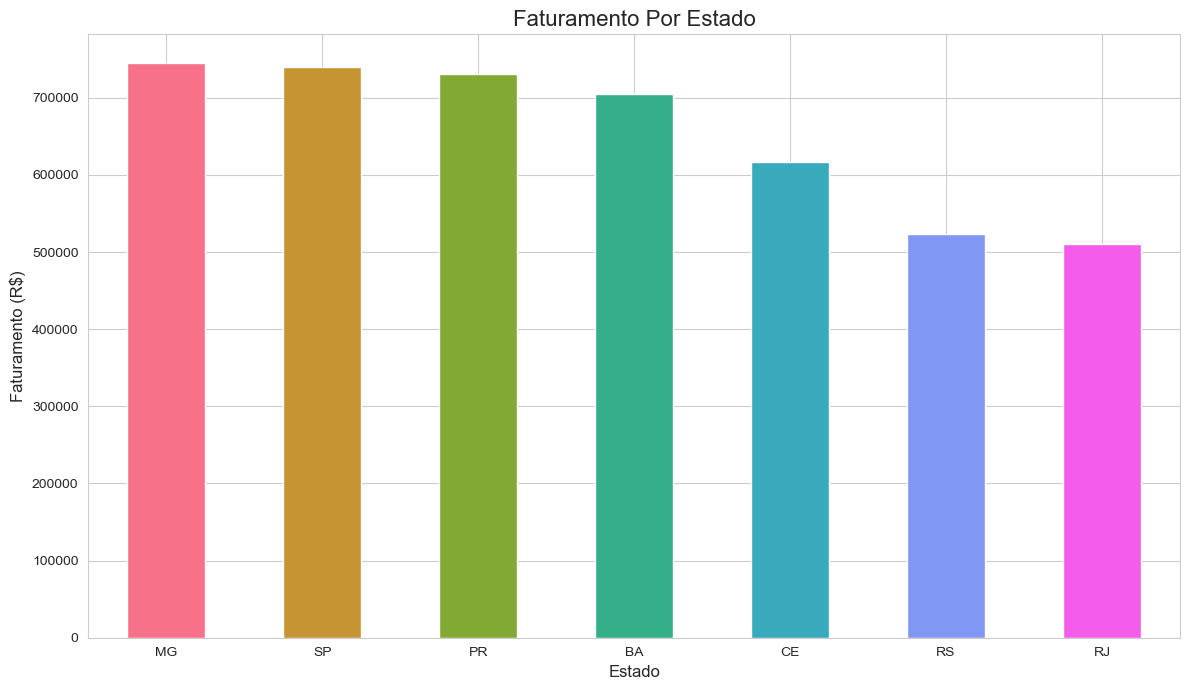

In [32]:
# Cria uma nova figura com tamanho de 12 por 7 polegadas
plt.figure(figsize = (12, 7))

# Plota os dados de faturamento por estado em formato de gráfico de barras
# Usando a paleta de cores "rocket" do Seaborn
vendas_estado.plot(kind = 'bar', color = sns.color_palette("husl", 7))

# Define o título do gráfico com fonte de tamanho 16
plt.title('Faturamento Por Estado', fontsize = 16)

# Define o rótulo do eixo X
plt.xlabel('Estado', fontsize = 12)

# Define o rótulo do eixo Y
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Mantém os rótulos do eixo X na horizontal (sem rotação)
plt.xticks(rotation = 0)

# Ajusta automaticamente os elementos do gráfico para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 9. Análise 4 - Faturamento Por Categoria

Qual o faturamento total por categoria?

In [33]:
# Agrupa por categoria, soma o faturamento e formata como moeda para melhor leitura
faturamento_categoria = df_vendas.groupby('Categoria')['Faturamento'].sum().sort_values(ascending = False)

In [34]:
# O .map('{:,.2f}'.format) é opcional, mas deixa a visualização do número mais clara
faturamento_categoria.map('R$ {:,.2f}'.format)

Categoria
Eletrônicos    R$ 2,688,100.00
Hardware       R$ 1,206,600.00
Acessórios       R$ 395,797.40
Móveis           R$ 282,000.00
Name: Faturamento, dtype: object

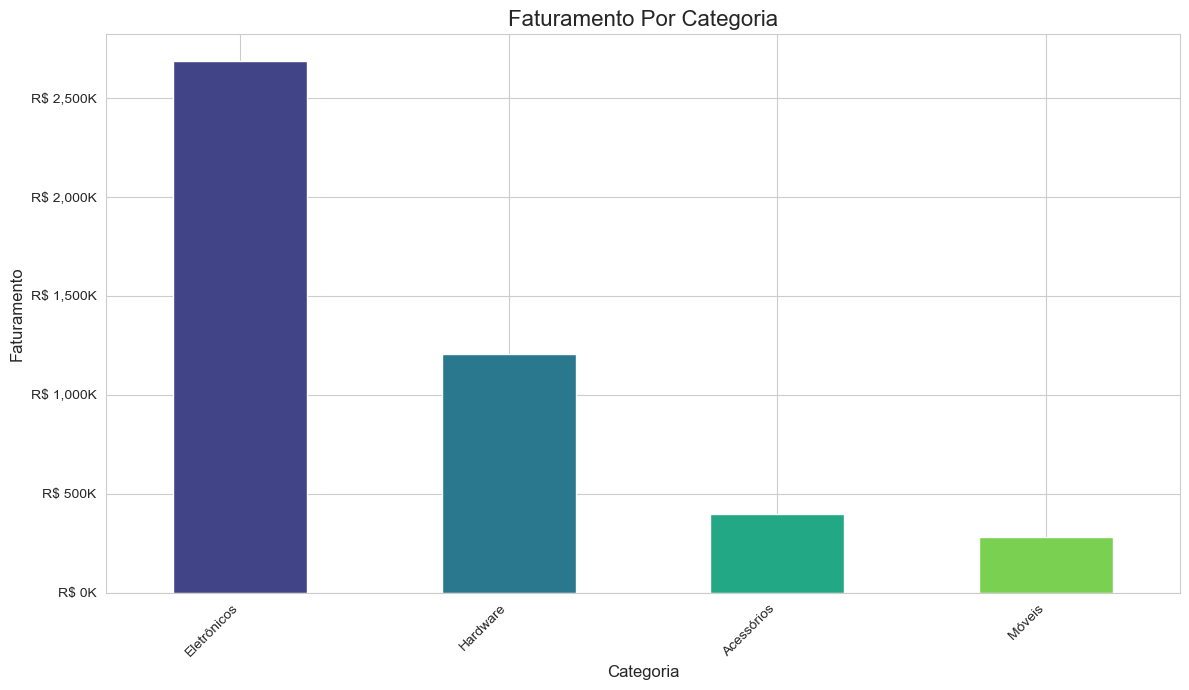

In [35]:
# Importa a função FuncFormatter para formatar os eixos
from matplotlib.ticker import FuncFormatter

# Ordena os dados para o gráfico ficar mais fácil de ler
faturamento_ordenado = faturamento_categoria.sort_values(ascending = False)

# Cria a Figura e os Eixos (ax) com plt.subplots()
# Isso nos dá mais controle sobre os elementos do gráfico.
fig, ax = plt.subplots(figsize = (12, 7))

# Cria uma função para formatar os números
# Esta função recebe um valor 'y' e o transforma em uma string no formato 'R$ XX K'
def formatador_milhares(y, pos):
    """Formata o valor em milhares (K) com o cifrão R$."""
    return f'R$ {y/1000:,.0f}K'

# Cria o objeto formatador
formatter = FuncFormatter(formatador_milhares)

# Aplica o formatador ao eixo Y (ax.yaxis)
ax.yaxis.set_major_formatter(formatter)

# Plota os dados usando o objeto 'ax'
faturamento_ordenado.plot(kind = 'bar', ax = ax, color = sns.color_palette("viridis", len(faturamento_ordenado)))

# Adiciona títulos e labels usando 'ax.set_...'
ax.set_title('Faturamento Por Categoria', fontsize = 16)
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Faturamento', fontsize = 12)

# Ajusta a rotação dos rótulos do eixo X
plt.xticks(rotation = 45, ha = 'right')

# Garante que tudo fique bem ajustado na imagem final
plt.tight_layout()

# Exibe o gráfico
plt.show()

## 10. Conclusão e Entrega do Resultado

Existem várias formas de entregar um projeto de análise de dados e a escolha depende do público, do contexto e dos objetivos. Três formas bastante utilizadas são:

**10.1. Relatório técnico ou executivo (PDF, DOCX, etc.)**

Essa forma é clássica e muito útil quando o público precisa de um documento formal para consulta. O relatório pode conter descrição da metodologia, exploração dos dados, gráficos, tabelas e conclusões. É comum separar a linguagem: uma versão mais técnica (com código, estatísticas detalhadas e testes) e outra mais executiva (com foco em insights, recomendações e storytelling de dados).

**10.2. Dashboard interativo (Power BI, Tableau, Looker, Streamlit, Dash, etc.)**

Um dashboard permite que os usuários explorem os dados por conta própria, filtrando informações, ajustando períodos de tempo ou focando em variáveis específicas. Essa forma de entrega é muito valorizada em ambientes corporativos, pois facilita a tomada de decisão contínua e não exige conhecimentos técnicos avançados dos usuários finais.

**10.3. Apresentação (slides em PowerPoint, Google Slides, etc.)**

Ideal para reuniões de stakeholders, a entrega em formato de apresentação resume os principais pontos do projeto. Ela foca nas descobertas mais relevantes, nas implicações para o negócio e nas recomendações práticas, usando gráficos e visualizações impactantes. A ideia é contar a história dos dados de forma clara e direta, evitando sobrecarregar o público com detalhes técnicos.

Confira exemplos práticos em <a href="https://www.datascienceacademy.com.br/course/storytelling-dashboards-e-tecnicas-de-apresentacao-para-cientistas-de-dados">Storytelling, Dashboards e Técnicas de Apresentação Para Cientistas de Dados</a>

Se isto aqui é um Mini-Projeto, então o que é um projeto inteiro na DSA? Nas Formações e Programas de Pós-Graduação você vai descobrir. ;-)

# Fim